# Modeling

This is a classification problem in supervised learning. We will evaluate below classification algorithms:  
1. Logistic Regression  
2. K-Nearest Neighbors (KNN)  
3. Support vector machine (SVM)  
4. Random Forest  
5. Naive Bayes  
6. Gradient Boost

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from time import time
import pickle

In [2]:
X_train = pd.read_csv('X_train.csv')
X_train_scaled = pd.read_csv('X_train_scaled.csv')
X_test = pd.read_csv('X_test.csv')
X_test_scaled = pd.read_csv('X_test_scaled.csv')
y_train = pd.read_csv('y_train.csv',squeeze=True)
y_test = pd.read_csv('y_test.csv',squeeze=True)

### Baseline Model

We create a simple baseline classifier here to compare with other real classifiers.

In [3]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent',random_state=0)
dummy.fit(X_train,y_train)
dummy.score(X_test,y_test)

0.6929473520087314

### 1. Logistic Regression

Some combinations were omitted to cut back on the warnings/errors.

In [4]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000,random_state=0)
param_distributions = {
                        'C': [0.01,0.1,1,10,100],
                        'penalty': ['l1','l2'],
                        'solver': ['newton-cg','lbfgs','liblinear','sag','saga']
}
search = RandomizedSearchCV(lr,param_distributions,cv=5,random_state=0)

search.fit(X_train_scaled,y_train)
search.best_params_

C:\Users\Billy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Billy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Billy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


{'solver': 'liblinear', 'penalty': 'l2', 'C': 1}

In [5]:
lr = search.best_estimator_
lr.score(X_test_scaled,y_test)

0.8549451691700015

In [6]:
with open('lr', 'wb') as file:
    pickle.dump(lr,file)

# with open('lr', 'rb') as file:
#     lr_load = pickle.load(file)

In [7]:
# start = time()
# lr = LogisticRegression(penalty='l2', C=1, solver='liblinear', max_iter=1000, random_state=0)
# lr.fit(X_train_scaled,y_train)
# end = time()

# lr.score(X_test_scaled,y_test)

# lr_time = end - start
# print(lr_time)

### 2. K-Nearest Neighbors (KNN)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_distributions = {
                        'n_neighbors': list(range(1,21,2)),
                        'weights': ['uniform','distance'],
                        'metric': ['euclidean','manhattan','minkowski']
}
search = RandomizedSearchCV(knn,param_distributions,cv=5,random_state=0,verbose=1,n_jobs=-1)

search.fit(X_train_scaled,y_train)
search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.0min finished


{'weights': 'distance', 'n_neighbors': 15, 'metric': 'manhattan'}

In [13]:
knn = search.best_estimator_
knn.score(X_test_scaled,y_test)

0.9999480276492906

In [14]:
with open('knn', 'wb') as file:
    pickle.dump(knn,file)

In [15]:
# start = time()
# knn = KNeighborsClassifier(n_neighbors=4)
# knn.fit(X_train_scaled,y_train)
# knn.score(X_test_scaled,y_test)
# end = time()

# knn_time = (end - start)//60
# print(knn_time)

### 3. Support Vector Machine (SVM)

In [16]:
from sklearn.svm import SVC

svc = SVC()
param_distributions = {
                        'C': [0.1, 1, 10, 100],
                        'kernel': ['linear','poly','rbf','sigmoid'],
                        'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001]
}
search = RandomizedSearchCV(svc,param_distributions,cv=5,random_state=0,verbose=1,n_jobs=-1)

search.fit(X_train_scaled,y_train)
search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 219.7min finished


{'kernel': 'rbf', 'gamma': 10, 'C': 1}

In [18]:
svc = search.best_estimator_
svc.score(X_test_scaled,y_test)

0.9590977599916845

In [19]:
with open('svc', 'wb') as file:
    pickle.dump(svc,file)

In [20]:
# start = time()
# svc = SVC()
# svc.fit(X_train_scaled,y_train)
# end = time()

# scv.score(X_test_scaled,y_train)

# svc_time = (end - start)//60
# print(svc_time)

### 4. Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
param_distributions = {
                        'n_estimators': [10, 100, 1000],
                        'criterion': ['gini','entropy'],
                        'max_features': [1,5,10,15,20]
}
search = RandomizedSearchCV(rf,param_distributions,cv=5,random_state=0,verbose=2,n_jobs=-1)

search.fit(X_train,y_train)
search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:  1.8min remaining:   12.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.9min finished


{'n_estimators': 1000, 'max_features': 1, 'criterion': 'entropy'}

In [24]:
rf = search.best_estimator_
rf.score(X_test,y_test)

0.9999480276492906

In [25]:
with open('rf', 'wb') as file:
    pickle.dump(rf,file)

In [26]:
# start = time()
# rf = RandomForestClassifier()
# rf.fit(X_train,y_train)
# end = time()

# rf.score(X_test,y_test)

# rf_time = (end - start)//60
# print(rf_time)

### 5. Gaussian Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
param_distributions = {'var_smoothing': np.logspace(0,-9, num=5)}
search = RandomizedSearchCV(nb,param_distributions,cv=5,random_state=0,verbose=2,n_jobs=-1)

search.fit(X_train,y_train)
search.best_params_

C:\Users\Billy\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done   7 out of  25 | elapsed:    2.0s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    2.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.3s finished


{'var_smoothing': 1e-09}

In [43]:
nb = search.best_estimator_
nb.score(X_test,y_test)

0.8141988462138142

In [44]:
with open('nb', 'wb') as file:
    pickle.dump(nb,file)

In [30]:
# start = time()
# nb = GaussianNB()
# nb.fit(X_train,y_train)
# end = time()

# nb.score(X_test_scaled,y_test)

# svc_time = (end - start)//60
# print(svc_time)

### 6. Gradient Boost - XGBoost

In [31]:
import xgboost as xgb

xgb = xgb.XGBClassifier()
param_distributions = {
                        'learning_rate': [0.001,0.01,0.1],
                        'max_depth': [2,5,10,20],  
                        'gamma': [0.05,0.1,0.5,1],
                        'reg_lambda': [0.01,0.1,1],
                        'reg_alpha': [0,0.1,0.5,1],
                        'subsample': [0.6,0.8,1],
                        'colsample_bytree': [0.6,0.8,1]
}
search = RandomizedSearchCV(xgb,param_distributions,cv=5,random_state=0,verbose=2,n_jobs=-1)

search.fit(X_train,y_train)
search.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:   56.0s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


{'subsample': 0.6,
 'reg_lambda': 0.1,
 'reg_alpha': 0.5,
 'max_depth': 20,
 'learning_rate': 0.01,
 'gamma': 0.1,
 'colsample_bytree': 0.6}

In [32]:
xgb = search.best_estimator_
xgb.score(X_test,y_test)

0.995946156644665

In [33]:
with open('xgb', 'wb') as file:
    pickle.dump(xgb,file)

In [34]:
# start = time()
# xgb = xgb.XGBClassifier(subsample=0.6,reg_lambda=0.1,reg_alpha=0.5,max_depth=20,
#                         learning_rate=0.01,gamma=0.1,colsample_bytree=0.6)
# xgb.fit(X_train,y_train)
# end = time()

# xgb.score(X_test,y_test)

# xgb_time = (end - start)//60
# print(xgb_time)

### Model Evaluation

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

### 1. Logistic Regression

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     13333
           1       0.69      0.55      0.61      3946
           2       0.84      0.77      0.80      1962

    accuracy                           0.85     19241
   macro avg       0.81      0.76      0.78     19241
weighted avg       0.85      0.85      0.85     19241



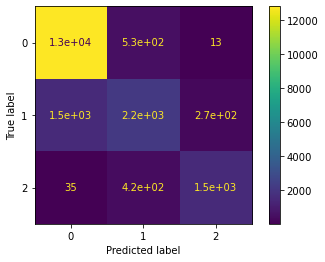

In [54]:
# classification report
y_pred_lr = lr.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr))

# plot the confusion matrix
plot_confusion_matrix(lr,X_test_scaled,y_test)

### 2. K-Nearest Neighbors

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13333
           1       1.00      1.00      1.00      3946
           2       1.00      1.00      1.00      1962

    accuracy                           1.00     19241
   macro avg       1.00      1.00      1.00     19241
weighted avg       1.00      1.00      1.00     19241



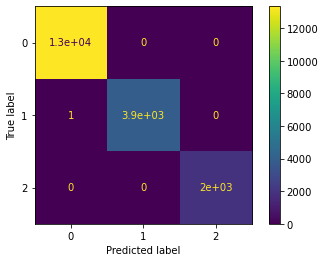

In [55]:
# classification report
y_pred_knn = knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred_knn))

# plot the confusion matrix
plot_confusion_matrix(knn,X_test_scaled,y_test)

### 3. Support Vector Machine (SVM)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     13333
           1       0.98      0.83      0.90      3946
           2       1.00      0.98      0.99      1962

    accuracy                           0.96     19241
   macro avg       0.98      0.93      0.95     19241
weighted avg       0.96      0.96      0.96     19241



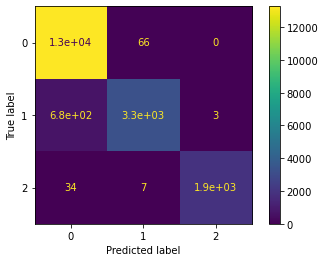

In [57]:
# classification report
y_pred_svc = svc.predict(X_test_scaled)
print(classification_report(y_test, y_pred_svc))

# plot the confusion matrix
plot_confusion_matrix(svc,X_test_scaled,y_test)

### 4. Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13333
           1       1.00      1.00      1.00      3946
           2       1.00      1.00      1.00      1962

    accuracy                           1.00     19241
   macro avg       1.00      1.00      1.00     19241
weighted avg       1.00      1.00      1.00     19241



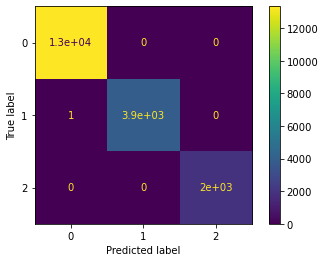

In [58]:
# classification report
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

# plot the confusion matrix
plot_confusion_matrix(rf,X_test,y_test)

### 5. Gaussian Naive Bayes

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     13333
           1       0.56      0.47      0.51      3946
           2       0.72      0.74      0.73      1962

    accuracy                           0.81     19241
   macro avg       0.72      0.71      0.72     19241
weighted avg       0.80      0.81      0.81     19241



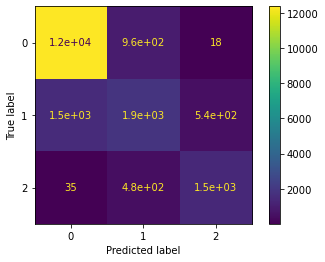

In [59]:
# classification report
y_pred_nb = nb.predict(X_test)
print(classification_report(y_test, y_pred_nb))

# plot the confusion matrix
plot_confusion_matrix(nb,X_test,y_test)

### 6. Gradient Boost - XGBoost

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     13333
           1       1.00      0.98      0.99      3946
           2       1.00      1.00      1.00      1962

    accuracy                           1.00     19241
   macro avg       1.00      0.99      1.00     19241
weighted avg       1.00      1.00      1.00     19241



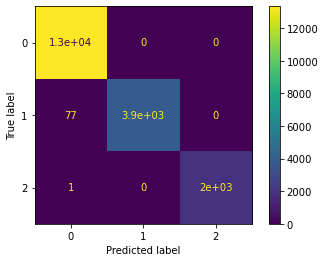

In [60]:
# classification report
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

# plot the confusion matrix
plot_confusion_matrix(xgb,X_test,y_test)